In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from skimage import io
import os
import pandas as pd
import random

In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage import io
datagen = ImageDataGenerator(
        #rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        #shear_range=0.2,
        zoom_range=0.4,
        fill_mode='constant',
        cval=0.0
    )

img = io.imread('project_data/images/train/corona/0728.jpeg')  # this is a PIL image
print(img.shape)
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
#for batch in datagen.flow(x, batch_size=1,
  #                        save_to_dir='/', save_prefix='cat', save_format='jpeg'):
 #   i += 1
   # if i > 3:
    #    break  # otherwise the generator would loop indefinitely

Using TensorFlow backend.


(256, 256, 3)


In [3]:
file_label = open("project_data/labels/train_labels.txt", "r")
val_labels = open("project_data/labels/val_labels.txt", "r")
bho = [(line.strip()).split() for line in file_label]
numeri_test = [numero[0] for numero in bho]
y_train = [nome[1] for nome in bho]

dio = [(line.strip()).split() for line in val_labels]
numeri_val = [numero[0] for numero in dio]
y_val = [nome[1] for nome in dio]

#X_train è unsorted
#X_train contiene tutte le immagini ma non sono sortate per nome
import glob
X_train = []
X_val = []
X_train_corona = []
X_train_viral = []
X_train_normal = []
X_train_bact = []
nome_cartella = ["bacteria", "corona", "normal", "viral"]

for numero in numeri_test:
    for cartella in nome_cartella:
        for img in glob.glob("project_data/images/train/{}/{}.jpeg".format(cartella, numero)):
            if cartella == "corona":
                n = io.imread(img, as_gray=True)
                #n = np.reshape(n,65536)
                n = n.tolist()
                X_train_corona.append(n)
            elif cartella == "viral":
                n = io.imread(img, as_gray=True)
                #n = np.reshape(n,65536)
                n = n.tolist()
                X_train_viral.append(n)
            elif cartella == "normal":
                n = io.imread(img, as_gray=True)
                #n = np.reshape(n,65536)
                n = n.tolist()
                X_train_normal.append(n)
            elif cartella == "bacteria":
                n = io.imread(img, as_gray=True)
                #n = np.reshape(n,65536)
                n = n.tolist()
                X_train_bact.append(n)
for numero in numeri_val:
    for cartella in nome_cartella:
        for img in glob.glob("project_data/images/val/{}/{}.jpeg".format(cartella, numero)):
            n = io.imread(img, as_gray=True)
            #n = np.reshape(n,65536)
            n = n.tolist()
            X_val.append(n) 
#print(len(X_train[0]))
#plt.imshow(X_train[0])
print(len(X_train_corona))

45


In [4]:
print(len(X_train_normal))

951


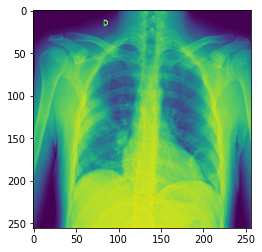

In [5]:
plt.imshow(X_train_corona[0])

In [6]:
print(len(X_train_corona))
print(len(X_train_viral))
print(len(X_train_normal))
print(len(X_train_bact))

45
909
951
1664


In [7]:
nome_cartella_aug = ["bacterial", "corona", "normale", "viral"]
file_label = open("augmented/train_labels1.txt", "r")
bho = [(line.strip()).split() for line in file_label]
numeri_test = [numero[0] for numero in bho]

for cartella in nome_cartella_aug:
    for numero in numeri_test:
        for img in glob.glob("augmented/{}/{}.jpeg".format(cartella, numero)):
            os.remove(img)
os.remove("augmented/train_labels1.txt")

In [8]:
for img in X_train_corona:
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
        save_to_dir='augmented/corona', save_prefix='bho', save_format='jpeg'):
        i += 1
        if i > 50:
            break  # otherwise the generator would loop indefinitely
for img in X_train_normal:
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
        save_to_dir='augmented/normale', save_prefix='cane', save_format='jpeg'):
        i += 1
        if i > 3:
            break  # otherwise the generator would loop indefinitely
for img in X_train_bact:
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
        save_to_dir='augmented/bacterial', save_prefix='nice', save_format='jpeg'):
        i += 1
        if i > 2:
            break  # otherwise the generator would loop indefinitely
for img in X_train_viral:
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
        save_to_dir='augmented/viral', save_prefix='bho3', save_format='jpeg'):
        i += 1
        if i > 1:
            break  # otherwise the generator would loop indefinitely

In [9]:
#rinomino random dei files
path_corona = 'augmented/corona'
files_corona = os.listdir(path_corona)
path_normale = 'augmented/normale'
files_normale = os.listdir(path_normale)
path_bact = 'augmented/bacterial'
files_bact = os.listdir(path_bact)
path_viral = 'augmented/viral'
files_viral = os.listdir(path_viral)

tutti_files = files_corona + files_normale + files_bact + files_viral
np.random.shuffle(tutti_files)

patho = ['augmented/corona',  'augmented/normale','augmented/bacterial', 'augmented/viral']
lunghezza = len(tutti_files)
i = 0
with open('augmented/train_labels1.txt', 'w') as f:
    for file in tutti_files:
        if(i == lunghezza):
            break
        for cartella in patho:
            files = os.listdir(cartella)
            for nome_file in files:
                if(nome_file == file):
                    os.rename(os.path.join(cartella, file), os.path.join(cartella, ''.join([str('{:05d}'.format(i)), '.jpeg'])))
                    if(cartella == 'augmented/corona'):
                        f.write("{:05d} COVID-19\n".format(i))
                    elif(cartella == 'augmented/normale'):
                         f.write("{:05d} normal\n".format(i))
                    elif(cartella == 'augmented/bacterial'):
                         f.write("{:05d} bacteria\n".format(i))
                    elif(cartella == 'augmented/viral'):
                         f.write("{:05d} viral\n".format(i))
        i = i+1

In [11]:
# faccio il label file per il train test
#with open('augmented/train_labels1.txt', 'w') as f:
#    path = 'augmented/corona'
#    files = os.listdir(path)
 #   for index, file in enumerate(files):
  #      f.write("{:05d} COVID-19\n".format(index))
   # path = 'augmented/normale'
    #files = os.listdir(path)
    #for index, file in enumerate(files):
   #     f.write("{:05d} normal\n".format(index+corona_index+1))
   # path = 'augmented/bacterial'
   # files = os.listdir(path)
   # for index, file in enumerate(files):
   #     f.write("{:05d} bacteria\n".format(index+normale_index+2))
   # path = 'augmented/viral'
   # files = os.listdir(path)
   # for index, file in enumerate(files):
   #     f.write("{:05d} viral\n".format(index+bact_index+3))

In [11]:
file_label = open("augmented/train_labels1.txt", "r")
val_labels = open("project_data/labels/val_labels.txt", "r")
bho = [(line.strip()).split() for line in file_label]
numeri_test = [numero[0] for numero in bho]
y_train = [nome[1] for nome in bho]

dio = [(line.strip()).split() for line in val_labels]
numeri_val = [numero[0] for numero in dio]
y_val = [nome[1] for nome in dio]

import glob
X_train = []
X_val = []
nome_cartella_aug = ["bacterial", "corona", "normale", "viral"]
nome_cartella = ["bacteria", "corona", "normal", "viral"]

for numero in numeri_test:
    for cartella in nome_cartella_aug:
        for img in glob.glob("augmented/{}/{}.jpeg".format(cartella, numero)):
            n = io.imread(img, as_gray=True)
            n = np.reshape(n,65536)
            n = n.tolist()
            X_train.append(n) 
for numero in numeri_val:
    for cartella in nome_cartella:
        for img in glob.glob("project_data/images/val/{}/{}.jpeg".format(cartella, numero)):
            n = io.imread(img, as_gray=True)
            n = np.reshape(n,65536)
            n = n.tolist()
            X_val.append(n) 

In [12]:
print(len(X_train[0]))
print(len(X_train))

65536
10747


In [13]:
import numpy as np 

X_train = np.stack(X_train, axis = 0)

X_train.shape
#plt.imshow(X_train[0])


(10747, 65536)

In [14]:
X_train = X_train[:][:]/255

In [15]:
print(X_train[2][:1000])

[0.00784314 0.00392157 0.00392157 0.         0.00392157 0.00392157
 0.00784314 0.00784314 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01176471 0.01568627 0.01960784 0.01568627 0.00392157 0.
 0.         0.         0.00392157 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00392157 0.00392157
 0.         0.         0.         0.         0.         0.00392157
 0.00392157 0.00392157 0.         0.         0.         0.00392157
 0.00392157 0.00392157 0.         0.         0.00392157 0.00392157
 0.00784314 0.00392157 0.         0.         0.00784314 0.01176471
 0.         0.         0.         0.         0.00392157 0.00784314
 0.00784314 0.00392157 0.         0.         0.         0.00392157
 0.00392157 0.         0.         0.         0.00392157 0.00392157
 0.00392157 0.00392157 0.00392157 0.0078431

In [16]:
print(X_train[0])

[0.4745098  0.46666667 0.45490196 ... 0.04313725 0.04705882 0.05098039]


In [17]:
print(len(y_train))
print(len(X_val))

10747
1189


In [18]:
from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0)
clf_rand.fit(X_train, y_train)

y_pred = clf_rand.predict(X_val)
print(y_pred[:100])

['normal' 'normal' 'bacteria' 'normal' 'bacteria' 'normal' 'bacteria'
 'normal' 'normal' 'bacteria' 'normal' 'normal' 'bacteria' 'bacteria'
 'bacteria' 'normal' 'normal' 'bacteria' 'bacteria' 'normal' 'normal'
 'normal' 'normal' 'bacteria' 'normal' 'bacteria' 'normal' 'normal'
 'normal' 'bacteria' 'normal' 'normal' 'bacteria' 'bacteria' 'normal'
 'bacteria' 'normal' 'normal' 'bacteria' 'bacteria' 'normal' 'normal'
 'bacteria' 'bacteria' 'normal' 'normal' 'normal' 'bacteria' 'bacteria'
 'bacteria' 'bacteria' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'bacteria' 'bacteria' 'bacteria'
 'bacteria' 'bacteria' 'viral' 'normal' 'bacteria' 'normal' 'normal'
 'normal' 'bacteria' 'normal' 'bacteria' 'normal' 'bacteria' 'normal'
 'normal' 'normal' 'bacteria' 'bacteria' 'bacteria' 'bacteria' 'bacteria'
 'normal' 'bacteria' 'normal' 'bacteria' 'bacteria' 'normal' 'bacteria'
 'normal' 'bacteria' 'bacteria' 'normal' 'normal' 'bacteria' 'normal'
 'normal' 'normal

In [19]:
print(len(y_pred))

1189


In [20]:
print(y_pred[:1000])

['normal' 'normal' 'bacteria' 'normal' 'bacteria' 'normal' 'bacteria'
 'normal' 'normal' 'bacteria' 'normal' 'normal' 'bacteria' 'bacteria'
 'bacteria' 'normal' 'normal' 'bacteria' 'bacteria' 'normal' 'normal'
 'normal' 'normal' 'bacteria' 'normal' 'bacteria' 'normal' 'normal'
 'normal' 'bacteria' 'normal' 'normal' 'bacteria' 'bacteria' 'normal'
 'bacteria' 'normal' 'normal' 'bacteria' 'bacteria' 'normal' 'normal'
 'bacteria' 'bacteria' 'normal' 'normal' 'normal' 'bacteria' 'bacteria'
 'bacteria' 'bacteria' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'bacteria' 'bacteria' 'bacteria'
 'bacteria' 'bacteria' 'viral' 'normal' 'bacteria' 'normal' 'normal'
 'normal' 'bacteria' 'normal' 'bacteria' 'normal' 'bacteria' 'normal'
 'normal' 'normal' 'bacteria' 'bacteria' 'bacteria' 'bacteria' 'bacteria'
 'normal' 'bacteria' 'normal' 'bacteria' 'bacteria' 'normal' 'bacteria'
 'normal' 'bacteria' 'bacteria' 'normal' 'normal' 'bacteria' 'normal'
 'normal' 'normal

In [21]:
from sklearn.metrics import accuracy_score, recall_score
accuracy_score(y_val , y_pred)

0.5803195962994113

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

In [ ]:
y_pred = svm_clf.predict(X_val)
accuracy_score(y_val , y_pred)

In [19]:
from sklearn.metrics import accuracy_score, recall_score
accuracy_score(y_val , y_pred)

0.6375105130361648

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_val)

accuracy_score(y_val, y_pred)

NameError: name 'x_val' is not defined

In [21]:
y_pred = knn_clf.predict(X_val)

accuracy_score(y_val, y_pred)

0.46509671993271656